# Exploratary Data Analysis(EDA) of Titanic dataset
## <<<<<<<< About the dataset >>>>>>>>
#### The Titanic dataset provides information on the passengers aboard the Titanic, a British passenger liner that sank in the North Atlantic Ocean in April 1912 after hitting an iceberg. The data is commonly used to predict which passengers survived the disaster based on features like age, sex, and class.

#### Dataset files:- 1. train.csv – Contains training data including the survival status.

#### 2. test.csv – Contains test data without survival status (used for predictions).

#### 3. gender_submission.csv – A sample submission file predicting survival by gender.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
titanic_data = sns.load_dataset('titanic')
titanic_data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Check dataset summary and missing values

In [7]:
# Dataset Overview
print("Shape of the dataset:", titanic_data.shape)
print("\nColumns in the dataset:\n", titanic_data.columns)


Shape of the dataset: (891, 15)

Columns in the dataset:
 Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [8]:
# Check for missing values
print("\nMissing values in each column:\n", titanic_data.isnull().sum())


Missing values in each column:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [9]:

# datatypes and summary statistics
print("\nData types:\n", titanic_data.dtypes)
print("\nSummary Statistics:\n", titanic_data.describe(include='all'))


Data types:
 survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Summary Statistics:
           survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.0000

## <<<<<<<<< Heatmap for missing values >>>>>>>>>
### Heatmap:- A heatmap is a data visualization technique that shows the magnitude of a phenomenon as color in two dimensions. It is often used to:

#### -> Detect missing values

#### -> Visualize correlation between variables

#### -> Display any matrix-like data visually



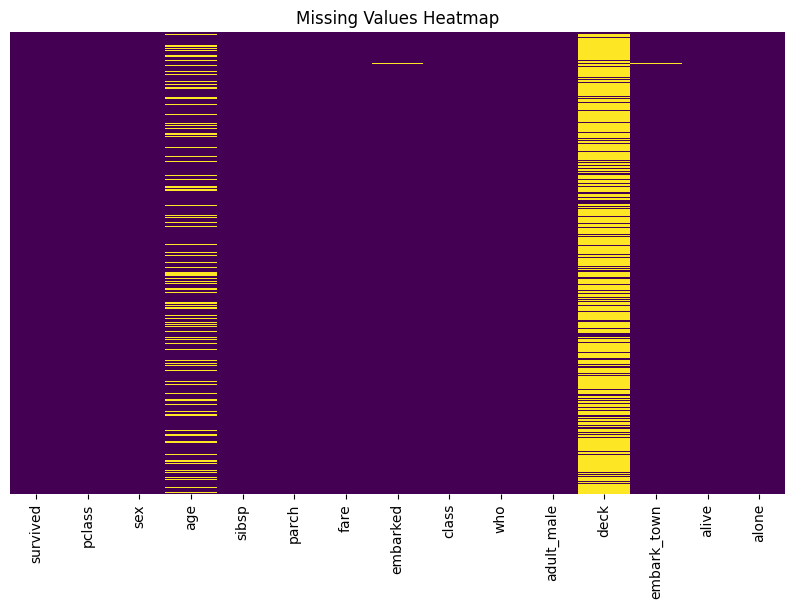

In [10]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## <<<<<<<< Handling the missing values >>>>>>>>

In [11]:
# Fill missing values with machine learning algo
# Import necessary libraries
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor


In [12]:
# Create a copy to avoid modifying the origninal dataframe
titanic_data_filled =  titanic_data.copy()

In [13]:
# Separate the numericals and categorical dataset
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns


In [14]:
# Use IteratiiveImputer for numerical features
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [15]:
# fill categorical value with the mode(most frequent value)
for col in categorical_cols:

    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])



In [16]:
# Verify if there are any missing values left

print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())


Missing values after imputation:
 survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64


## Univariate Analysis
### Univariate analysis is the simplest form of data analysis — it involves examining only one variable at a time.

#### Key Goals:
#### -> Understand the distribution, central tendency, and spread of the variable.
#### -> Identify outliers, missing values, or unusual patterns.
#### -> Determine the data type: is it categorical (like gender) or numerical (like age)?





Survival Count:
 survived
0.0    549
1.0    342
Name: count, dtype: int64


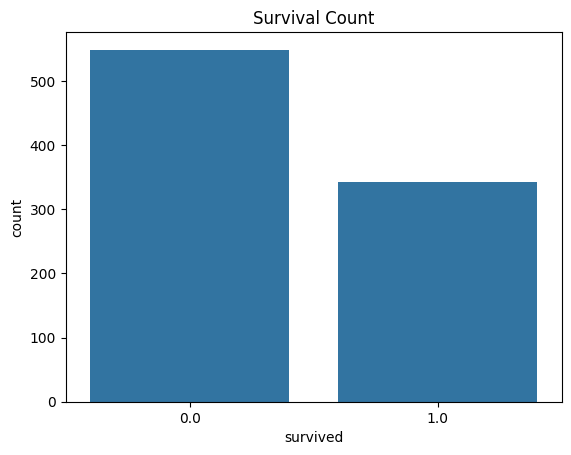

In [17]:
# Analyzed 'survived' variable
print("\nSurvival Count:\n", titanic_data_filled['survived'].value_counts())
sns.countplot(x='survived', data=titanic_data_filled)
plt.title('Survival Count')
plt.show()


Pclass Distribution:
 pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


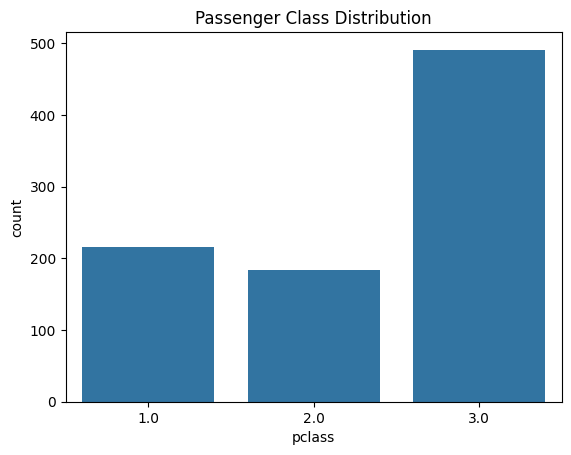

In [18]:
# Analyzed 'pclass'
print("\nPclass Distribution:\n", titanic_data_filled['pclass'].value_counts())
sns.countplot(x='pclass', data=titanic_data_filled)
plt.title('Passenger Class Distribution')
plt.show()


Age Statistics:
 count    891.000000
mean      29.677801
std       13.769057
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64


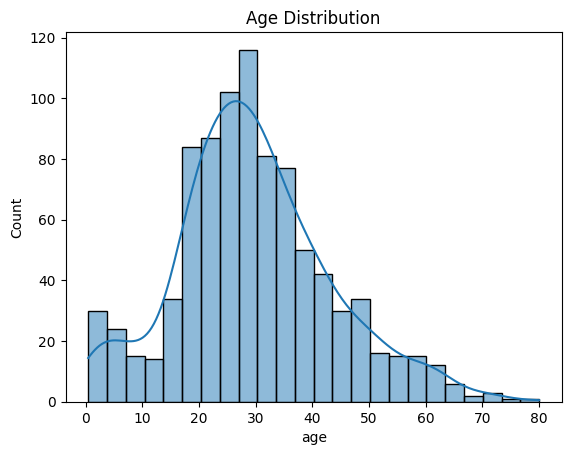

In [19]:
# Analyzed 'age' variable
print("\nAge Statistics:\n", titanic_data_filled['age'].describe())
sns.histplot(x='age', data=titanic_data_filled, kde=True)
plt.title('Age Distribution')
plt.show()


Sex Distribution:
 sex
male      577
female    314
Name: count, dtype: int64


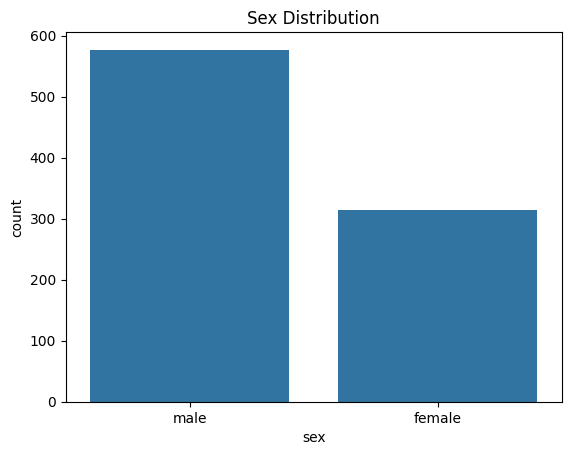

In [20]:
# Analyzed 'sex' variable
print("\nSex Distribution:\n", titanic_data_filled['sex'].value_counts())
sns.countplot(x='sex', data=titanic_data_filled)
plt.title('Sex Distribution')
plt.show()

## Bivariate Analysis
### Bivariate analysis is the examination of two variables to discover whether they are related, and how they influence each other.
### Goals of Bivariate Analysis:
#### -> Identify relationships or associations between two variables.
#### -> Understand the direction (positive/negative) and strength of relationships.
#### -> Determine if the relationship is causal, correlational, or independent.




Survival by Gender:
 sex     survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


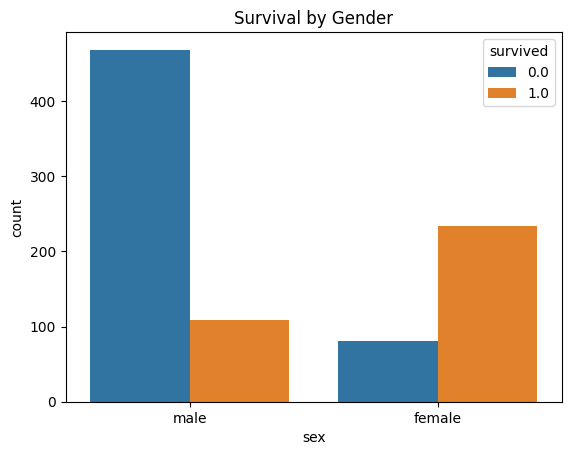

In [21]:
# Explore survival trends based on gender, class and age
# Analyze survival based on gender
print("\nSurvival by Gender:\n", titanic_data_filled.groupby('sex')['survived'].value_counts())
sns.countplot(x='sex', hue='survived', data=titanic_data_filled)
plt.title('Survival by Gender')
plt.show()



Survival by Passenger Class:
 pclass  survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


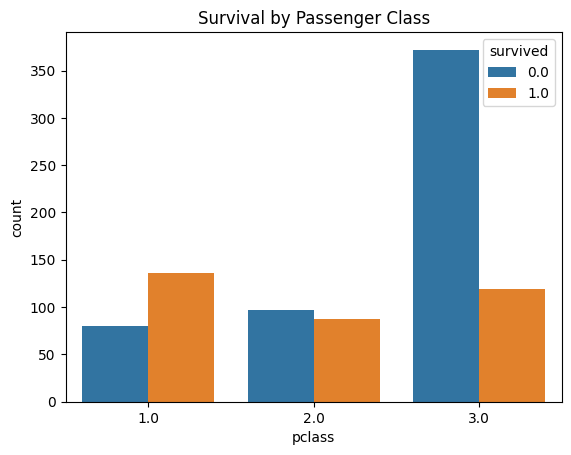

In [22]:
# Analyze survival based on passenger class
print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('pclass')['survived'].value_counts())
sns.countplot(x='pclass', hue='survived', data=titanic_data_filled)
plt.title('Survival by Passenger Class')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15832\1157021363.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())



Survival by Age Group:
 age_group  survived
Child      0.0          80
           1.0          78
Adult      0.0         462
           1.0         263
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


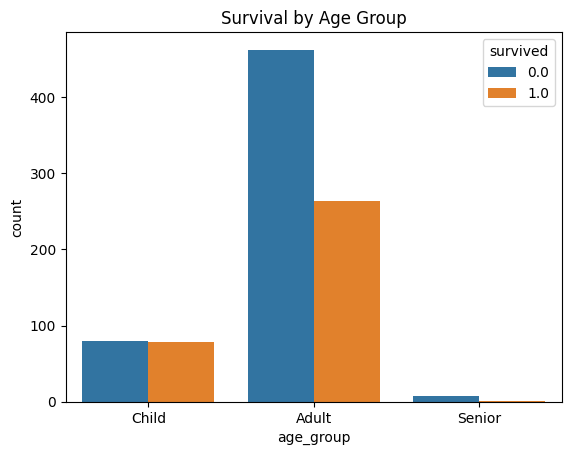

In [23]:
# Analyze survival based on age groups
titanic_data_filled['age_group'] = pd.cut(titanic_data_filled['age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])
print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('age_group')['survived'].value_counts())
sns.countplot(x='age_group', hue='survived', data=titanic_data_filled)
plt.title('Survival by Age Group')
plt.show()



Survival by Gender and Class:
 sex     pclass  survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


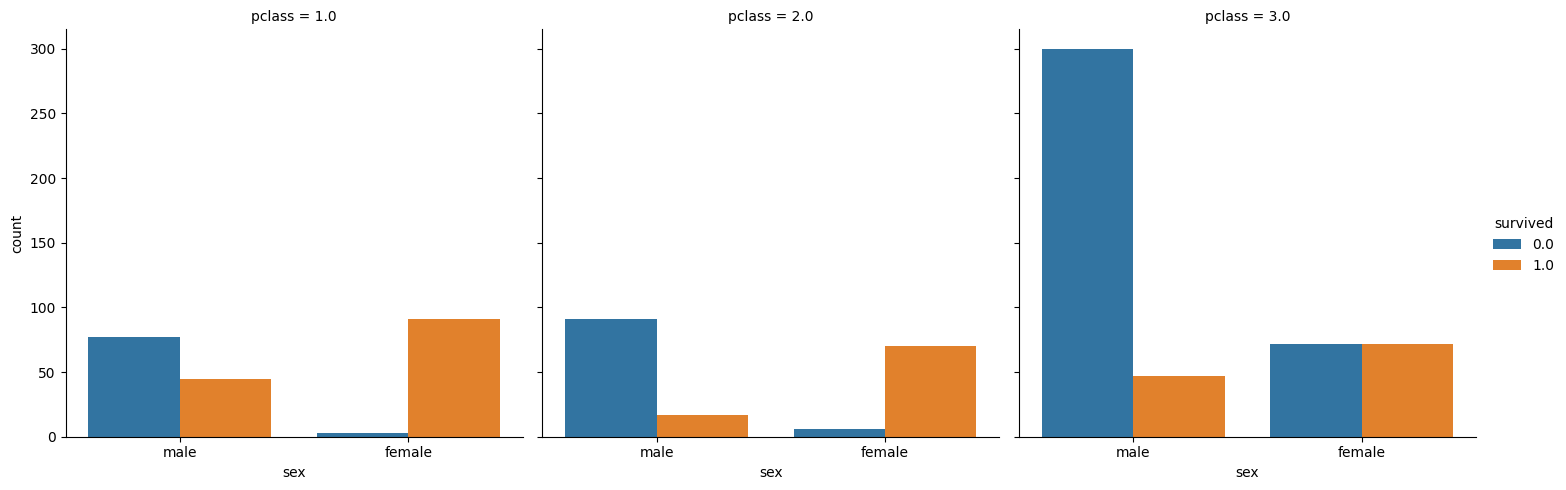

In [24]:
# Further exploration: Analyze survival based on combinations of factors
# Example: Survival based on gender and class
print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['sex', 'pclass'])['survived'].value_counts())
sns.catplot(x='sex', hue='survived', col='pclass', kind='count', data=titanic_data_filled)
plt.show()

## Survival Analysis
### We’ll analyze how survival depends on specific features, such as:

#### Embarkation points.

#### are ranges.

#### Family size (combining sibsp and parch).

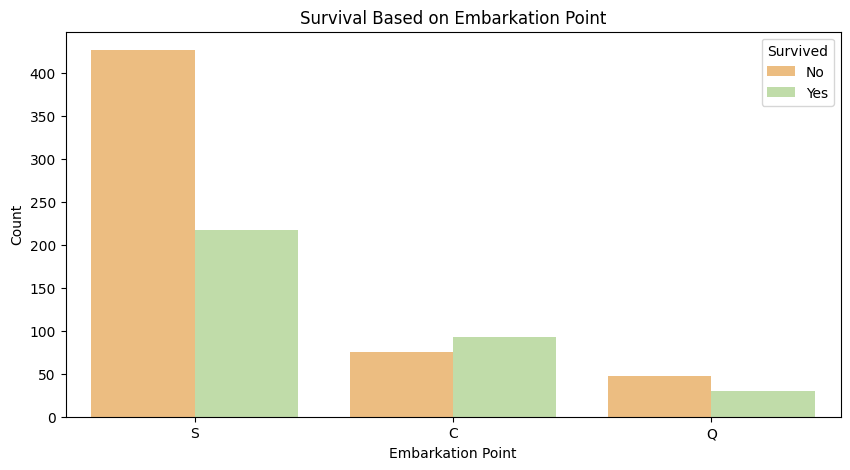

In [25]:
# Survival based embarkation points
plt.figure(figsize=(10, 5))
sns.countplot(x='embarked', hue='survived', data=titanic_data, palette='Spectral')
plt.title('Survival Based on Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


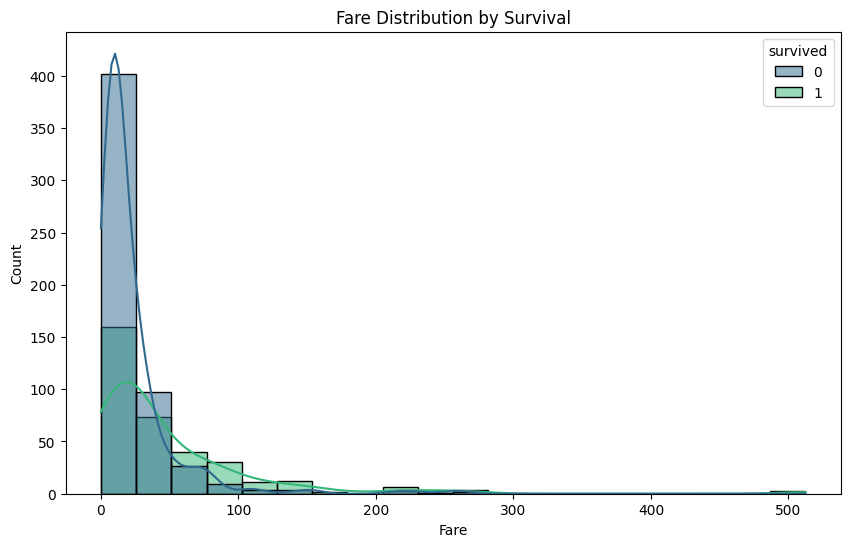

In [26]:
# survival based on fare
plt.figure(figsize=(10, 6))
sns.histplot(titanic_data, x='fare', hue='survived', bins=20, kde=True, palette='viridis')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

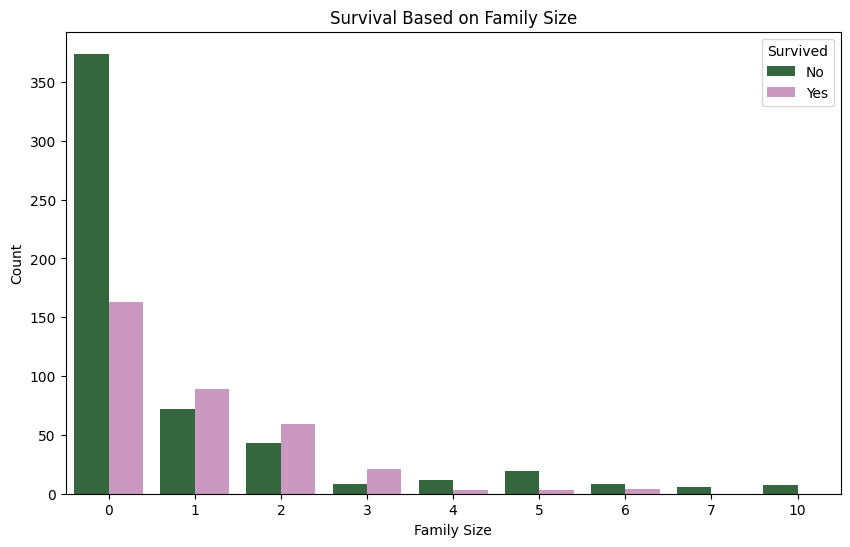

In [27]:
# based on family size
titanic_data['family_size'] = titanic_data['sibsp'] + titanic_data['parch']
plt.figure(figsize=(10, 6))
sns.countplot(x='family_size', hue='survived', data=titanic_data, palette='cubehelix')
plt.title('Survival Based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


## Feature engineering
### Create meaningful features for better insights:

#### Family Size: Combine sibsp and parch.

#### Group: Categorize passengers into age brackets.

In [28]:
# Create age groups
bins = [0, 12, 18, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']
titanic_data['age_group'] = pd.cut(titanic_data['age'], bins=bins, labels=labels)


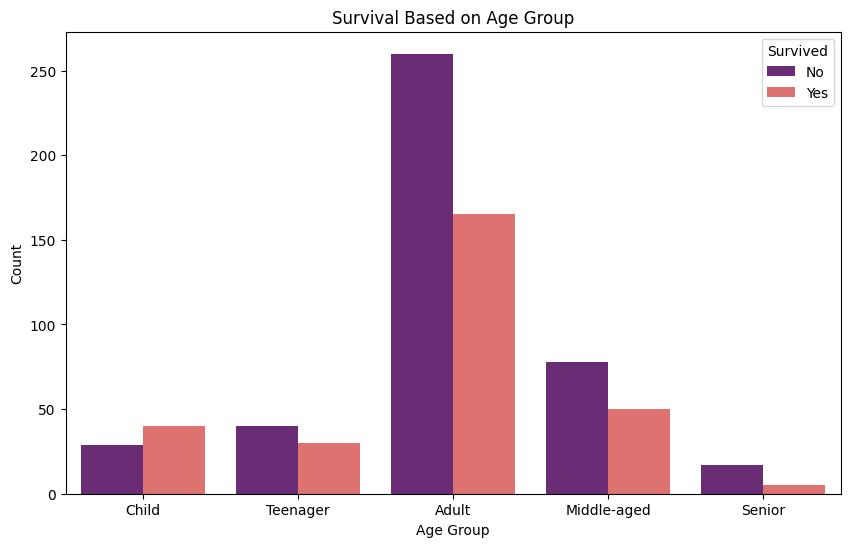

In [29]:
# Visualize Survival by Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age_group', hue='survived', data=titanic_data, palette='magma')
plt.title('Survival Based on Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

## Advanced visualization


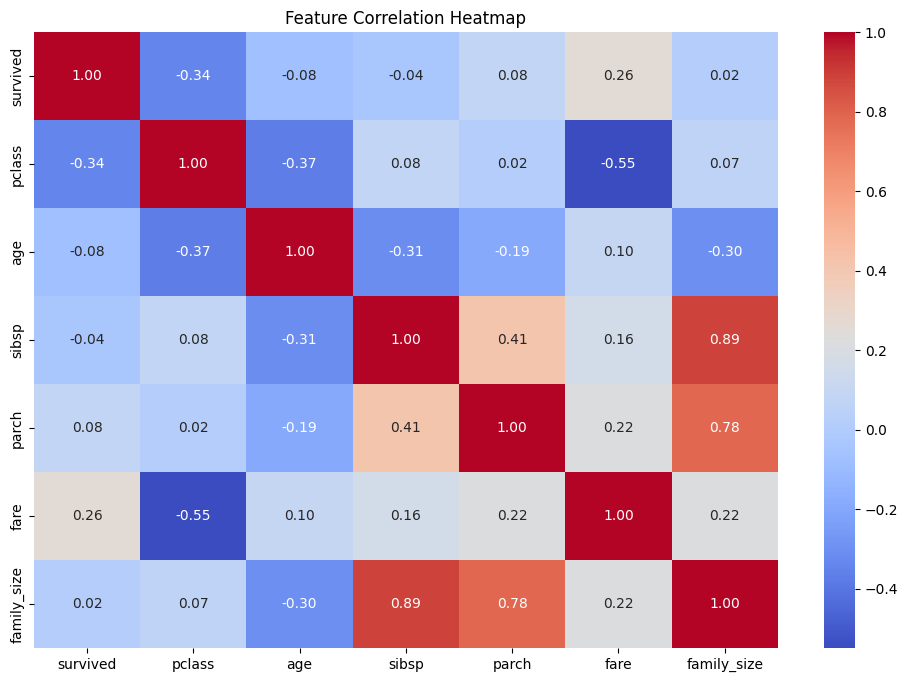

In [30]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
# Select only numeric features for correlation calculation
numeric_features = titanic_data.select_dtypes(include=np.number)
sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

## Outlier detection

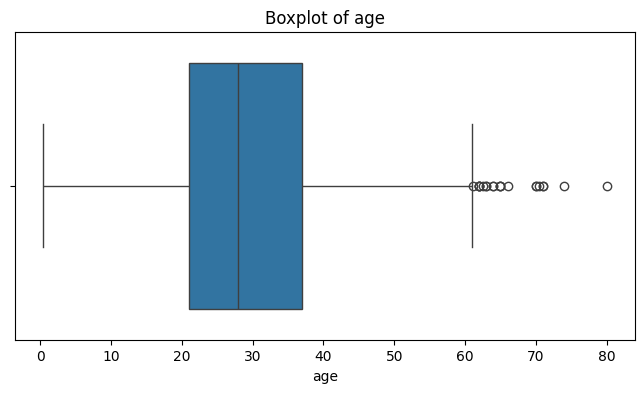

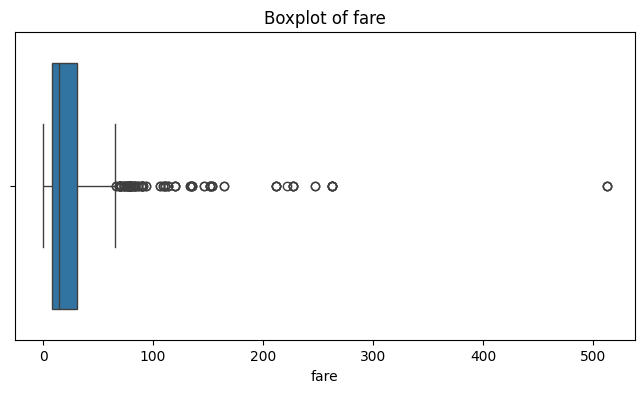

In [34]:
for col in ['age', 'fare']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=titanic_data_filled[col])
    plt.title(f"Boxplot of {col}")
    plt.show()
